# Prediction March Madness

## Import Libs

In [1]:
import pandas as pd #dataframes
import matplotlib.pyplot as plt 
import numpy as np # n-dim object support
# do ploting inline instead of in a separate window
%matplotlib inline
import random

## Load and review data

In [2]:
df_team = pd.read_csv("data/team_yearly_stats.csv")
df_ps_game = pd.read_csv("data/post_season_games.csv")

In [3]:
df_ps_game.shape

(818, 7)

In [4]:
df_team.shape

(5300, 21)

In [5]:
df_team.head(5)

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.562500,13.062500,6.625000,5.843750,28.504883,15.437500,6.250000,2.593750,...,17.593750,64.812500,65.062500,0.471,0.377,0.705,0.500,0.375000,2.71,3.31
1,2011.0,Akron,24.777778,12.694444,7.861111,10.083333,34.108796,14.444444,6.666667,3.583333,...,19.222222,70.111111,65.694444,0.430,0.361,0.704,0.639,0.562500,2.15,-1.02
2,2011.0,Alabama A&M,22.607143,14.892857,4.464286,12.392857,37.343112,12.107143,8.321429,5.392857,...,20.071429,64.571429,66.785714,0.396,0.288,0.624,0.464,0.555556,-15.19,-11.75
3,2011.0,Alabama-Birmingham,24.387097,11.870968,7.709677,11.354839,35.407908,13.548387,5.290323,3.129032,...,16.580645,68.354839,62.580645,0.438,0.342,0.717,0.710,0.750000,8.55,2.78
4,2011.0,Alabama State,20.800000,15.000000,4.714286,13.142857,35.938776,11.542857,7.285714,4.657143,...,22.200000,61.314286,63.828571,0.395,0.283,0.603,0.486,0.611111,-13.37,-10.31


In [6]:
df_ps_game.head(5)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0
3,2011,Princeton,57.0,13.0,Kentucky,59.0,4.0
4,2011,Xavier,55.0,6.0,Marquette,66.0,11.0


## Check for nulls

In [7]:
df_team.isnull().values.any()

np.False_

In [8]:
df_ps_game.isnull().values.any()

np.False_

## How to query the dataframes for specific column values

In [9]:
df_team[(df_team['year'] == 2011) & (df_team['team_name'] == "Air Force")]

,year,team_name,fg_pg,ft_pg,three_pt_pg,orb_pg,drb_pg,ast_pg,stl_pg,blk_pg,...,pf_pg,pt_pg,opnt_pt_pg,fg_pct,three_p_pct,ft_pct,wl_pct,conf_wl_pct,srs,sos
0,2011.0,Air Force,22.5625,13.0625,6.625,5.84375,28.504883,15.4375,6.25,2.59375,...,17.59375,64.8125,65.0625,0.471,0.377,0.705,0.5,0.375,2.71,3.31


## Get team stats for post-season games

In [10]:
import shared
ps_team_stats_df = shared.get_team_stats_df(df_team, df_ps_game, True)

2011
LIU
2011
UNC Asheville
2012
UNC Asheville
2012
LIU
2012
Long Beach State
2012
NC State
2012
NC State
2012
NC State
2013
NC State
2013
California
2013
California
2014
NC State
2015
NC State
2015
NC State
2015
NC State
2016
UNC Wilmington
2016
California
2016
UNC Asheville
2017
UNC Wilmington
2018
Penn
2018
NC State
2018
TCU
2018
UMBC
2018
UMBC
2023
FDU
2023
FDU
2023
UCSB


In [11]:
ps_team_stats_df.head(5)

,team_name_1,fg_pg_1,ft_pg_1,three_pt_pg_1,orb_pg_1,drb_pg_1,ast_pg_1,stl_pg_1,blk_pg_1,tov_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,Texas-San Antonio,23.588235,16.058824,6.882353,10.647059,34.569204,12.647059,7.058824,2.235294,13.558824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,Villanova,24.121212,17.636364,6.363636,12.181818,36.691460,13.636364,6.303030,3.787879,11.878788,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,Clemson,23.823529,14.500000,6.382353,11.294118,34.285467,13.088235,8.000000,4.735294,13.205882,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False
3,Princeton,24.625000,13.937500,6.031250,9.843750,34.223633,13.343750,5.968750,4.187500,12.156250,...,74.868421,63.473684,0.459,0.397,0.710,0.763,0.625000,20.30,8.91,False
4,Xavier,24.500000,17.656250,5.406250,10.250000,34.992188,13.250000,5.437500,3.062500,12.062500,...,75.189189,68.810811,0.465,0.349,0.696,0.595,0.500000,14.89,8.51,False


## Concat the team stats with the post-season game data

In [12]:
ps_game_w_team_stats = pd.concat([df_ps_game, ps_team_stats_df], axis=1, join='inner')

In [13]:
ps_game_w_team_stats.head(3)

,year,team_1_name,team_1_score,team_1_seed,team_2_name,team_2_score,team_2_seed,team_name_1,fg_pg_1,ft_pg_1,...,pt_pg_2,opnt_pt_pg_2,fg_pct_2,three_p_pct_2,ft_pct_2,wl_pct_2,conf_wl_pct_2,srs_2,sos_2,t1_win
0,2011,UTSA,46.0,16.0,Ohio State,75.0,1.0,Texas-San Antonio,23.588235,16.058824,...,77.135135,59.675676,0.494,0.423,0.701,0.919,0.888889,25.84,8.38,False
1,2011,Villanova,57.0,9.0,George Mason,61.0,8.0,Villanova,24.121212,17.636364,...,72.764706,62.470588,0.471,0.395,0.689,0.794,0.888889,11.66,1.37,False
2,2011,Clemson,76.0,12.0,West Virginia,84.0,5.0,Clemson,23.823529,14.500000,...,69.787879,64.666667,0.429,0.337,0.711,0.636,0.611111,16.15,11.03,False


In [14]:

ps_game_w_team_stats.shape

(791, 48)

## Check true/false ratio for team 1 win

In [15]:
t1_win_map = {True:1, False:0}
ps_game_w_team_stats['t1_win'] = ps_game_w_team_stats['t1_win'].map(t1_win_map)
num_true = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == True])
num_false = len(ps_game_w_team_stats.loc[ps_game_w_team_stats['t1_win'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/(num_true+num_false))*100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/(num_true+num_false))*100))

Number of True cases: 388 (49.05%)
Number of False cases: 403 (50.95%)


## Setup training, validation, and testing splits

In [16]:
import sklearn.model_selection

ps_predict_class_names = ['t1_win']
ps_x = ps_game_w_team_stats[shared.ps_feature_col_names].values
ps_y = ps_game_w_team_stats[shared.ps_predict_class_names].values
split_test_size = 0.30

ps_x_train, ps_x_test, ps_y_train, ps_y_test = sklearn.model_selection.train_test_split(ps_x, ps_y, test_size=split_test_size, random_state=42)

In [17]:
print("{0:0.2f}% in training set".format((len(ps_x_train)/len(ps_game_w_team_stats.index))*100))
print("{0:0.2f}% in test set".format((len(ps_x_test)/len(ps_game_w_team_stats.index))*100))

69.91% in training set
30.09% in test set


## Imput with the mean

In [18]:
import sklearn.impute

#Impute with mean all 0 readings
fill_0 = sklearn.impute.SimpleImputer(missing_values=0, strategy="mean")

ps_x_train = fill_0.fit_transform(ps_x_train)
ps_x_test = fill_0.fit_transform(ps_x_test)

# TODO : impute incorrect negative values such anything other than (SOS and SRS

## Training Baive Bayes mode

In [19]:
from sklearn.naive_bayes import GaussianNB

ps_nb_model = GaussianNB()
ps_nb_model.fit(ps_x_train, ps_y_train.ravel())

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


### Perfrormance on Testing Data

In [20]:

ps_nb_predict_test = ps_nb_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_nb_predict_test)))

Accuracy: 0.7143


In [21]:
print("Ps - Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(ps_y_test, ps_nb_predict_test, labels=[1, 0])))
print("")

print("PS -Classification Report")
print(metrics.classification_report(ps_y_test, ps_nb_predict_test, labels=[1, 0]))

Ps - Confusion Matrix
[[82 39]
 [29 88]]

PS -Classification Report
              precision    recall  f1-score   support

           1       0.74      0.68      0.71       121
           0       0.69      0.75      0.72       117

    accuracy                           0.71       238
   macro avg       0.72      0.71      0.71       238
weighted avg       0.72      0.71      0.71       238



## Random Forsest

In [22]:
from sklearn.ensemble import RandomForestClassifier
ps_rf_model = RandomForestClassifier(random_state=42)
ps_rf_model.fit(ps_x_train, ps_y_train.ravel())

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [23]:
ps_rf_predict_test = ps_rf_model.predict(ps_x_test)
from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(ps_y_test, ps_rf_predict_test))) # Will be low because of over-fitting

Accuracy: 0.7227


## Logistic Regression

D:\code\MachineLearningMarchMadness\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\code\MachineLearningMarchMadness\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules

1st max valu of 0.678 occured at C=0.100


D:\code\MachineLearningMarchMadness\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


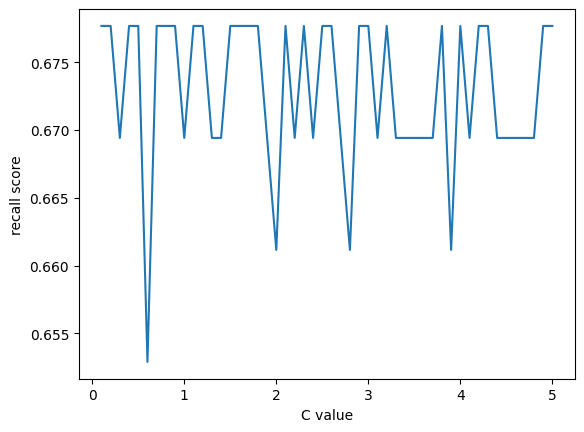

In [24]:
from sklearn.linear_model import LogisticRegression
# Setting up regularization Params
def get_best_score_C_val_for_LR(x_tr, y_tr, x_tst, y_tst):
    C_start = 0.1
    C_end = 5
    C_inc = 0.1
    C_values, recall_scores = [], []
    C_val = C_start
    best_recall_score = 0

    while (C_val < C_end):
        C_values.append(C_val)
        lr_model_loop = LogisticRegression(C=C_val, random_state=42)
        lr_model_loop.fit(x_tr, y_tr.ravel())
        lr_predict_loop_test = lr_model_loop.predict(x_tst)
        recall_score = metrics.recall_score(y_tst, lr_predict_loop_test)
        recall_scores.append(recall_score)
        if (recall_score > best_recall_score):
            best_recall_score = recall_score
            best_lr_predict_test = lr_predict_loop_test
        C_val = C_val + C_inc
    best_score_C_val = C_values[recall_scores.index(best_recall_score)]
    print("1st max valu of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))
    %matplotlib inline
    plt.plot(C_values, recall_scores, "-")
    plt.xlabel("C value")
    plt.ylabel("recall score")
    return best_score_C_val
ps_best_score_C_val = get_best_score_C_val_for_LR(ps_x_train, ps_y_train, ps_x_test, ps_y_test)

In [25]:

ps_lr_model = LogisticRegression(class_weight="balanced", C=ps_best_score_C_val, random_state=42)
ps_lr_model.fit(ps_x_train, ps_y_train.ravel())


D:\code\MachineLearningMarchMadness\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.1
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [26]:
ps_lr_predict_test = ps_lr_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_predict_test)))

Accuracy: {0:.4f} 0.7310924369747899


## Logistic Regression with Cross Validation

In [27]:
from sklearn.linear_model import LogisticRegressionCV
ps_lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=True, class_weight="balanced") #Set number of folds
ps_lr_cv_model.fit(ps_x_train, ps_y_train.ravel())


D:\code\MachineLearningMarchMadness\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1780: FutureWarning: The default value for l1_ratios will change from None to (0.0,) in version 1.10. From version 1.10 onwards, only array-like with values in [0, 1] will be allowed, None will be forbidden. To avoid this warning, explicitly set a value, e.g. l1_ratios=(0,).
  warnings.warn(
D:\code\MachineLearningMarchMadness\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1823: FutureWarning: The fitted attributes of LogisticRegressionCV will be simplified in scikit-learn 1.10 to remove redundancy. Set`use_legacy_attributes=False` to enable the new behavior now, or set it to `True` to silence this warning during the transition period while keeping the deprecated behavior for the time being. The default value of use_legacy_attributes will change from True to False in scikit-learn 1.10. See the docstring of LogisticRegressionCV for more details.
  warnings.warn(


,"Cs Cs: int or list of floats, default=10Each of the values in Cs describes the inverse of regularizationstrength. If Cs is as an int, then a grid of Cs values are chosenin a logarithmic scale between 1e-4 and 1e4.Like in support vector machines, smaller values specify strongerregularization.",3
,"l1_ratios l1_ratios: array-like of shape (n_l1_ratios), default=NoneFloats between 0 and 1 passed as Elastic-Net mixing parameter (scaling betweenL1 and L2 penalties). For `l1_ratio = 0` the penalty is an L2 penalty. For`l1_ratio = 1` it is an L1 penalty. For `0 < l1_ratio < 1`, the penalty is acombination of L1 and L2.All the values of the given array-like are tested by cross-validation and theone giving the best prediction score is used... warning:: Certain values of `l1_ratios`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `l1_ratios=None` is deprecated in 1.8 and will raise an error in version 1.10. Default value will change from `None` to `(0.0,)` in version 1.10.",'warn'
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"cv cv: int or cross-validation generator, default=NoneThe default cross-validation generator used is Stratified K-Folds.If an integer is provided, it specifies the number of folds, `n_folds`, used.See the module :mod:`sklearn.model_selection` module for thelist of possible cross-validation objects... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer dual=False whenn_samples > n_features.",False
,"penalty penalty: {'l1', 'l2', 'elasticnet'}, default='l2'Specify the norm of the penalty:- `'l2'`: add a L2 penalty term (used by default);- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"scoring scoring: str or callable, default=NoneThe scoring method to use for cross-validation. Options:- str: see :ref:`scoring_string_names` for options.- callable: a scorer callable object (e.g., function) with signature ``scorer(estimator, X, y)``. See :ref:`scoring_callable` for details.- `None`: :ref:`accuracy ` is used.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass` problems (`n_classes >= 3`), all solvers except 'liblinear' minimize the full multinomial loss, 'liblinear' will raise an error.- 'newton-cholesky' is a good choice for `n_samples` >> `n_features * n_classes`, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on `n_features * n_classes` because it explicitly computes the full Hessian matrix.- For small datasets, 'liblinear' is a good choice, whereas 'sag' and 'saga' are faster for large ones;- 'liblinear' might be slower in :class:`LogisticRegressionCV` because it does not handle warm-starting.- 'liblinear' can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass set

In [28]:
ps_lr_cv_predict_test = ps_lr_cv_model.predict(ps_x_test)
print("Accuracy: {0:.4f}",format(metrics.accuracy_score(ps_y_test, ps_lr_cv_predict_test)))

Accuracy: {0:.4f} 0.7436974789915967


# We have trained our models, not experiment with them to produce your bracket!

In [29]:
# Redundant bracket definitions removed. Using shared.team_names_*


In [30]:
# Redundant evaluation logic removed. Using shared.evaluate_tournament


## Post Season Trained Logistic Regression Model results


In [31]:
shared.evaluate_tournament(df_team, ps_lr_model) # bot 1


Evaluating Winner of  South
--- South  round  1 ---
Alabama 1  vs.  Hartford 16 (team 1 won= 1 )
Maryland 8  vs.  West Virginia 9 (team 1 won= 1 )
San Diego State 5  vs.  Charleston Southern 12 (team 1 won= 1 )
Virginia 4  vs.  Furman 13 (team 1 won= 1 )
Creighton 6  vs.  NC State 11 (team 1 won= 1 )
Baylor 3  vs.  UC Santa Barbara 14 (team 1 won= 1 )
Missouri 7  vs.  Utah State 10 (team 1 won= 0 )
Arizona 2  vs.  Princeton 15 (team 1 won= 1 )
--- South  round  2 ---
Alabama 1  vs.  Maryland 8 (team 1 won= 0 )
San Diego State 5  vs.  Virginia 4 (team 1 won= 1 )
Creighton 6  vs.  Baylor 3 (team 1 won= 1 )
Utah State 10  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  3 ---
Maryland 8  vs.  San Diego State 5 (team 1 won= 1 )
Creighton 6  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  4 ---
Maryland 8  vs.  Arizona 2 (team 1 won= 1 )
Winner of  South : ('Maryland', 8)
Evaluating Winner of  East
--- East  round  1 ---
Purdue 1  vs.  Texas Southern 16 (team 1 won= 1 )
Memphis 8  vs.  F

## Post Season Naive Baesean Model Results

In [32]:
shared.evaluate_tournament(df_team, ps_nb_model) # bot 2

Evaluating Winner of  South
--- South  round  1 ---
Alabama 1  vs.  Hartford 16 (team 1 won= 1 )
Maryland 8  vs.  West Virginia 9 (team 1 won= 1 )
San Diego State 5  vs.  Charleston Southern 12 (team 1 won= 1 )
Virginia 4  vs.  Furman 13 (team 1 won= 1 )
Creighton 6  vs.  NC State 11 (team 1 won= 1 )
Baylor 3  vs.  UC Santa Barbara 14 (team 1 won= 1 )
Missouri 7  vs.  Utah State 10 (team 1 won= 0 )
Arizona 2  vs.  Princeton 15 (team 1 won= 1 )
--- South  round  2 ---
Alabama 1  vs.  Maryland 8 (team 1 won= 1 )
San Diego State 5  vs.  Virginia 4 (team 1 won= 1 )
Creighton 6  vs.  Baylor 3 (team 1 won= 1 )
Utah State 10  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  3 ---
Alabama 1  vs.  San Diego State 5 (team 1 won= 1 )
Creighton 6  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  4 ---
Alabama 1  vs.  Arizona 2 (team 1 won= 0 )
Winner of  South : ('Arizona', 2)
Evaluating Winner of  East
--- East  round  1 ---
Purdue 1  vs.  Texas Southern 16 (team 1 won= 1 )
Memphis 8  vs.  Flor

In [33]:
# post season logistic regression with cross validation
shared.evaluate_tournament(df_team, ps_lr_cv_model) # bot 3

Evaluating Winner of  South
--- South  round  1 ---
Alabama 1  vs.  Hartford 16 (team 1 won= 1 )
Maryland 8  vs.  West Virginia 9 (team 1 won= 0 )
San Diego State 5  vs.  Charleston Southern 12 (team 1 won= 1 )
Virginia 4  vs.  Furman 13 (team 1 won= 1 )
Creighton 6  vs.  NC State 11 (team 1 won= 1 )
Baylor 3  vs.  UC Santa Barbara 14 (team 1 won= 1 )
Missouri 7  vs.  Utah State 10 (team 1 won= 0 )
Arizona 2  vs.  Princeton 15 (team 1 won= 1 )
--- South  round  2 ---
Alabama 1  vs.  West Virginia 9 (team 1 won= 1 )
San Diego State 5  vs.  Virginia 4 (team 1 won= 1 )
Creighton 6  vs.  Baylor 3 (team 1 won= 0 )
Utah State 10  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  3 ---
Alabama 1  vs.  San Diego State 5 (team 1 won= 1 )
Baylor 3  vs.  Arizona 2 (team 1 won= 0 )
--- South  round  4 ---
Alabama 1  vs.  Arizona 2 (team 1 won= 1 )
Winner of  South : ('Alabama', 1)
Evaluating Winner of  East
--- East  round  1 ---
Purdue 1  vs.  Texas Southern 16 (team 1 won= 1 )
Memphis 8  vs.  Fl

In [34]:
shared.evaluate_tournament(df_team, ps_rf_model)

Evaluating Winner of  South
--- South  round  1 ---
Alabama 1  vs.  Hartford 16 (team 1 won= 1 )
Maryland 8  vs.  West Virginia 9 (team 1 won= 0 )
San Diego State 5  vs.  Charleston Southern 12 (team 1 won= 1 )
Virginia 4  vs.  Furman 13 (team 1 won= 1 )
Creighton 6  vs.  NC State 11 (team 1 won= 1 )
Baylor 3  vs.  UC Santa Barbara 14 (team 1 won= 1 )
Missouri 7  vs.  Utah State 10 (team 1 won= 0 )
Arizona 2  vs.  Princeton 15 (team 1 won= 0 )
--- South  round  2 ---
Alabama 1  vs.  West Virginia 9 (team 1 won= 1 )
San Diego State 5  vs.  Virginia 4 (team 1 won= 1 )
Creighton 6  vs.  Baylor 3 (team 1 won= 1 )
Utah State 10  vs.  Princeton 15 (team 1 won= 1 )
--- South  round  3 ---
Alabama 1  vs.  San Diego State 5 (team 1 won= 0 )
Creighton 6  vs.  Utah State 10 (team 1 won= 1 )
--- South  round  4 ---
San Diego State 5  vs.  Creighton 6 (team 1 won= 0 )
Winner of  South : ('Creighton', 6)
Evaluating Winner of  East
--- East  round  1 ---
Purdue 1  vs.  Texas Southern 16 (team 1 won= 